# Preliminarie study on Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv("../Datasets/wholecells_binary.tsv", sep="\t",index_col = 0) 

array = df.values
col_ind = df.columns
row_ind = df.index

In [3]:
hf_index = []
ps_index = []
np_index = []
sg_index = []
sfg_index = []
all_index = []
state_index = []
for i in range(len(row_ind)):
    s = row_ind[i]
    if s[:2] == "HF":
        hf_index.append(i)
        all_index.append(3)
        state_index.append("HF")
    elif s[:2] == "PS":
        ps_index.append(i)
        all_index.append(1)
        state_index.append("PS")
    elif s[:2] == "NP":
        np_index.append(i)
        all_index.append(2)
        state_index.append("NP")
    elif s[:3] == "4SG":
        sg_index.append(i)
        all_index.append(4)
        state_index.append("4SG")
    else:
        sfg_index.append(i)
        all_index.append(5)
        state_index.append("4SFG")
        
PS = array[ps_index,:]
NP = array[np_index,:]
HF = array[hf_index,:]
SG = array[sg_index,:]
SFG = array[sfg_index,:]

In [4]:
d = {}
for X,s in [(PS,"ps"),(NP,"np"),(HF,"hf"),(SG,"4SG"),(SFG,"4SFG")]:
    tmp = X.sum(axis = 0)
    for i in range(len(col_ind)):
        if not col_ind[i] in d.keys():
            d[col_ind[i]] = {}
        d[col_ind[i]][s] = tmp[i]/len(X[:,])


print("Genes in 4SG group :")        
for k,v in d.items():
    if v["4SG"]/v["4SFG"] > 4:
        print(k)
        
print("Genes in 4SFG group :")        
for k,v in d.items():
    if v["4SG"] == 0 or v["4SFG"]/v["4SG"] > 4:
        print(k)

Genes in 4SG group :
Gata1
Nfe2
Gfi1b
Ikaros
Myb
HbbbH1
Genes in 4SFG group :
Erg
Sox17
HoxD8
Sox7
Etv2
Mecom
Cdh1
Tbx3
Meis1
HoxB4
HoxB2
Notch1
Cdh5
Tbx20


<bound method Figure.show of <Figure size 1152x864 with 48 Axes>>

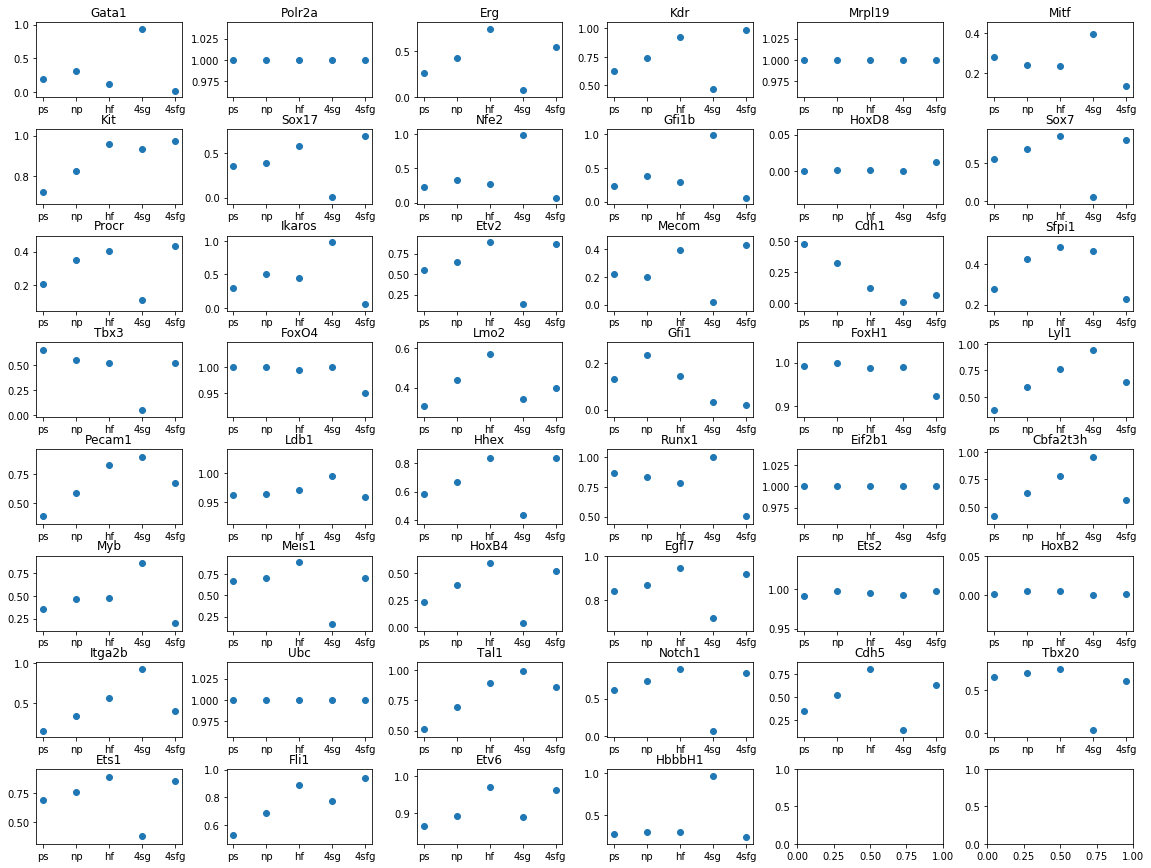

In [22]:
f, axes = plt.subplots(nrows = 8,ncols=6,figsize=(16,12))
f.tight_layout()
i = 0
j = 0
for k,v in d.items():
    axes[i,j].scatter(["ps","np","hf","4sg","4sfg"],[v["ps"],v["np"],v["hf"],v["4SG"],v["4SFG"]])
    axes[i,j].set_title(k)
    j = np.mod(j+1,6)
    if j == 0 :
        i += 1
f.savefig("exp.png")
f.show

In [32]:
l = []
m = []
for k,v in d.items():
    l.append([v["ps"],v["np"],v["hf"],v["4SG"],v["4SFG"]])
    m.append([k])

[[0.20192307692307693, 0.3170289855072464, 0.12736318407960198, 0.943031536113937, 0.015584415584415584], [1.0, 1.0, 1.0, 1.0, 1.0], [0.2548076923076923, 0.4257246376811594, 0.7323383084577114, 0.07324516785350967, 0.5376623376623376], [0.6266025641025641, 0.7409420289855072, 0.9213930348258706, 0.46185147507629704, 0.9831168831168832], [1.0, 1.0, 1.0, 1.0, 1.0], [0.28044871794871795, 0.23731884057971014, 0.23184079601990049, 0.3947100712105799, 0.13506493506493505], [0.7211538461538461, 0.8278985507246377, 0.9582089552238806, 0.9318413021363174, 0.9753246753246754], [0.358974358974359, 0.39311594202898553, 0.5840796019900497, 0.007121057985757884, 0.6909090909090909], [0.23237179487179488, 0.33695652173913043, 0.2656716417910448, 0.9867751780264497, 0.07012987012987013], [0.22596153846153846, 0.38405797101449274, 0.2935323383084577, 0.9806714140386572, 0.05714285714285714], [0.0, 0.0018115942028985507, 0.0009950248756218905, 0.0, 0.012987012987012988], [0.5576923076923077, 0.686594202

[[-0.44168963 -0.42981234 -0.45660565 -0.40473498 -0.49786797]
 [-0.10857024 -0.06706628 -0.23062481  0.89439731 -0.36135891]
 [ 0.75210587  0.28008581 -0.39595979 -0.15834745 -0.41716978]]
    principal component 1  principal component 2  principal component 3
0                0.640818               0.719668               0.076774
1               -0.916851               0.081190               0.103085
2                0.386613              -0.399477              -0.172619
3               -0.378473              -0.317985              -0.126925
4               -0.916851               0.081190               0.103085
5                0.755129               0.158801               0.109121
6               -0.660763               0.080600              -0.117206
7                0.372781              -0.488926              -0.098163
8                0.510790               0.702543               0.020810
9                0.489592               0.692888               0.024534
10               1

<bound method Figure.show of <Figure size 576x576 with 1 Axes>>

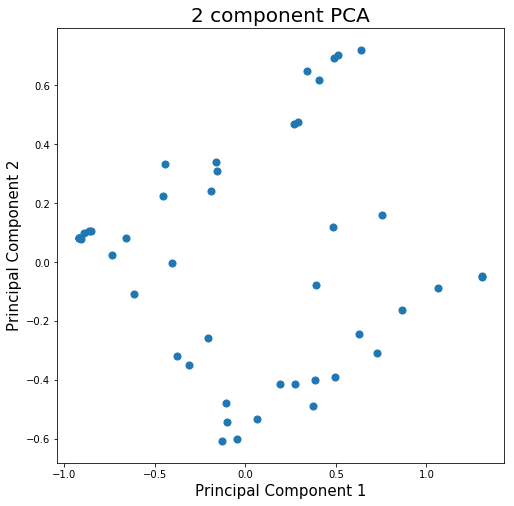

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)


principalComponents = pca.fit_transform(l)

print(pca.components_)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(principalDf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
           , principalDf['principal component 2']
           , s = 50)
fig.show

<bound method Figure.show of <Figure size 576x576 with 1 Axes>>

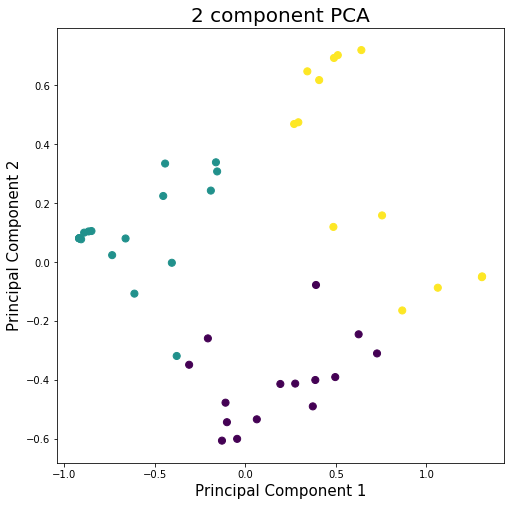

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random', n_init= 1).fit(principalDf.values)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
           , principalDf['principal component 2']
           , c = kmeans.predict(principalDf.values)
           ,s = 50)
fig.show

In [98]:
principalDf.loc[pred==2,'principal component 1']

0     0.640818
5     0.755129
8     0.510790
9     0.489592
10    1.306161
13    0.342592
16    0.866488
17    0.486510
21    1.062815
30    0.292922
35    1.307443
36    0.269700
45    0.407865
Name: principal component 1, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[['Gata1'], ['Polr2a'], ['Erg'], ['Kdr'], ['Mrpl19'], ['Mitf'], ['Kit'], ['Sox17'], ['Nfe2'], ['Gfi1b'], ['HoxD8'], ['Sox7'], ['Procr'], ['Ikaros'], ['Etv2'], ['Mecom'], ['Cdh1'], ['Sfpi1'], ['Tbx3'], ['FoxO4'], ['Lmo2'], ['Gfi1'], ['FoxH1'], ['Lyl1'], ['Pecam1'], ['Ldb1'], ['Hhex'], ['Runx1'], ['Eif2b1'], ['Cbfa2t3h'], ['Myb'], ['Meis1'], ['HoxB4'], ['Egfl7'], ['Ets2'], ['HoxB2'], ['Itga2b'], ['Ubc'], ['Tal1'], ['Notch1'], ['Cdh5'], ['Tbx20'], ['Ets1'], ['Fli1'], ['Etv6'], ['HbbbH1']]
Endothelial : ['Erg', 'Sox17', 'Sox7', 'Procr', 'Etv2', 'Mecom', 'Tbx3', 'Lmo2', 'Hhex', 'Meis1', 'HoxB4', 'Notch1', 'Cdh5', 'Tbx20', 'Ets1']
Hematopoietic : ['Gata1', 'Mitf', 'Nfe2', 'Gfi1b', 'HoxD8', 'Ikaros', 'Cdh1', 'Sfpi1', 'Gfi1', 'Myb', 'HoxB2', 'Itga2b', 'HbbbH1']
Progenitor : ['Polr2a', 'Kdr', 'Mrpl19', 'Kit', 'FoxO4', 'FoxH1', 'Lyl1', 'Pecam1', 'Ldb1', 'Runx1', 'Eif2b1', 'Cbfa2t3h', 'Egfl7', 'Ets2', 'Ubc', 'Tal1', 'Fli1', 'Etv6']


<bound method Figure.show of <Figure size 576x576 with 1 Axes>>

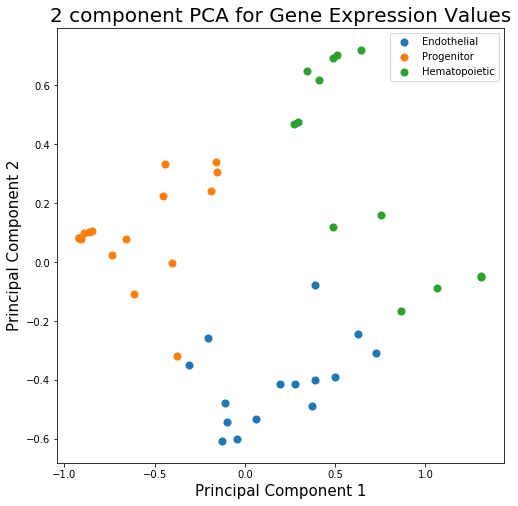

In [110]:
pred = kmeans.predict(principalDf.values)
print(m)
Hem = [m[i][0] for i in range(len(m)) if (pred ==2)[i]]
Pro = [m[i][0] for i in range(len(m)) if (pred ==1)[i]]
End = [m[i][0] for i in range(len(m)) if (pred ==0)[i]]
print("Endothelial :", End)
print("Hematopoietic :", Hem)
print("Progenitor :", Pro)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for Gene Expression Values', fontsize = 20)
for i in range(3):
    ax.scatter(principalDf.loc[pred==i,'principal component 1']
               , principalDf.loc[pred==i,'principal component 2']
               , c = sns.color_palette()[i]
               , s = 50)
ax.legend(["Endothelial","Progenitor","Hematopoietic"])
fig.savefig("genepca.png")
fig.show

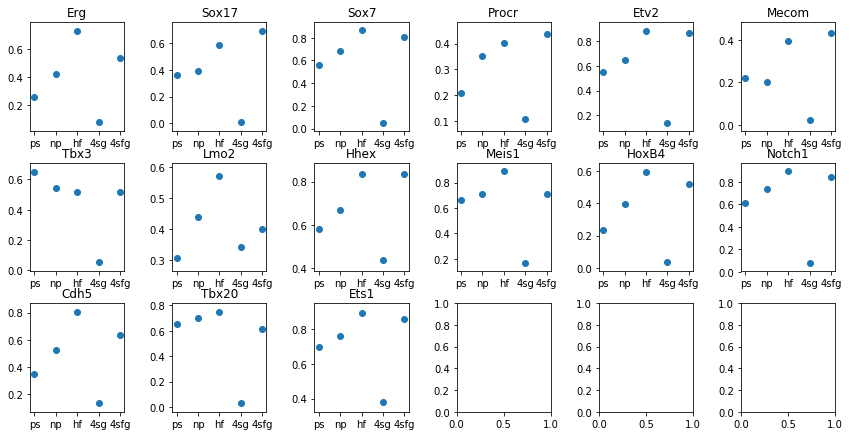

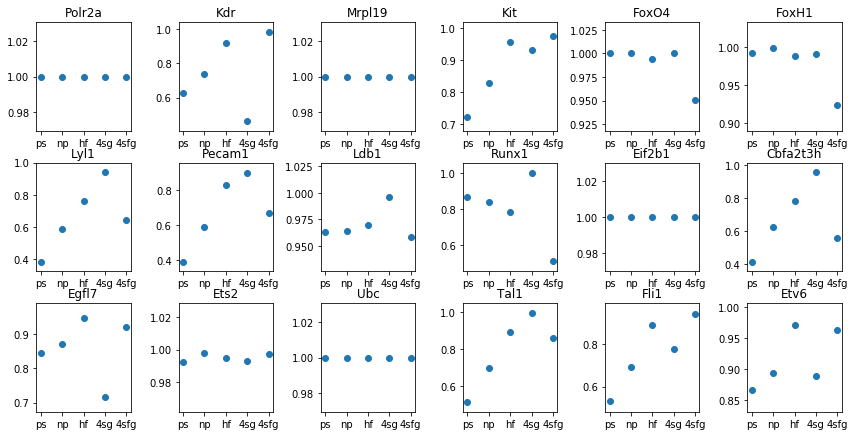

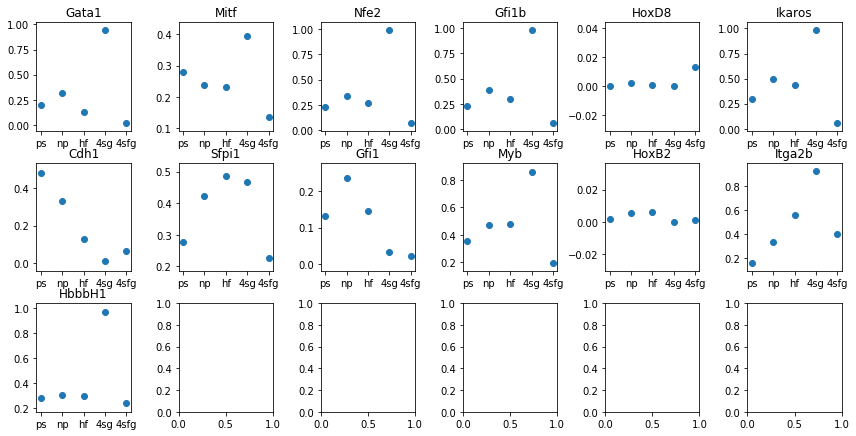

In [115]:
arr = [End,Pro,Hem]
for c in range(3):
    size = len(arr[c])//6
    if not len(arr[c])//6 == len(arr[c])/6:
        size += 1
    f, axes = plt.subplots(nrows = size,ncols=6,figsize=(12,2*size))
    f.tight_layout()
    i = 0
    j = 0
    for k,v in d.items():
        if k in arr[c]:
            axes[i,j].scatter(["ps","np","hf","4sg","4sfg"],[v["ps"],v["np"],v["hf"],v["4SG"],v["4SFG"]])
            axes[i,j].set_title(k)
            j = np.mod(j+1,6)
            if j == 0 :
                i += 1
    f.savefig("exp"+str(j)+'.png')
    f.show

In [112]:
print(arr[c])

['Gata1', 'Mitf', 'Nfe2', 'Gfi1b', 'HoxD8', 'Ikaros', 'Cdh1', 'Sfpi1', 'Gfi1', 'Myb', 'HoxB2', 'Itga2b', 'HbbbH1']


## PCA

In [25]:

principalComponents = pca.fit_transform(df.values)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

targets = pd.DataFrame(data = state_index, columns = ['targets'])

finalDf = pd.concat([principalDf, targets[['targets']]], axis = 1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

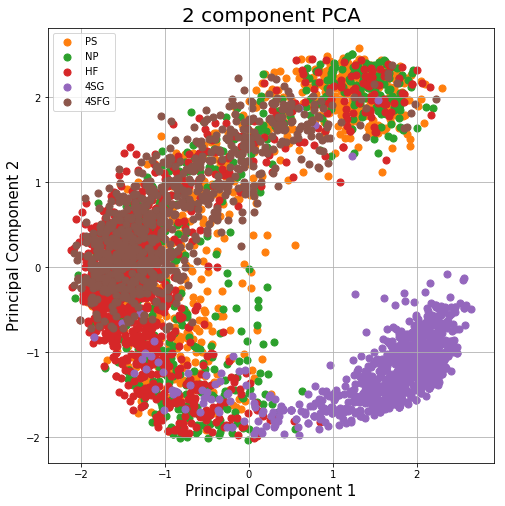

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['PS', 'NP', 'HF',"4SG","4SFG"]
colors = [sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[3],sns.color_palette()[4],sns.color_palette()[5]]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['targets'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig("pca.png")

## UMAP

In [28]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(df.values)
embedding.shape

(3934, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

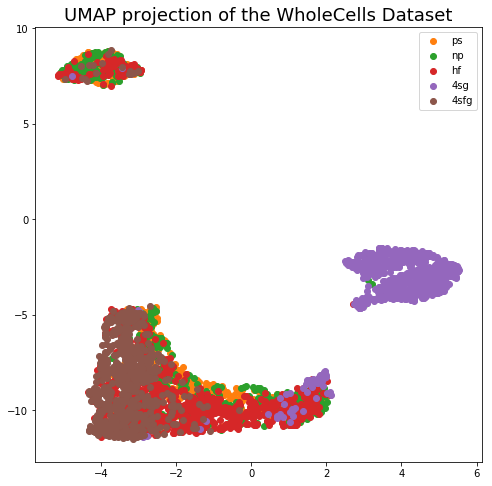

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


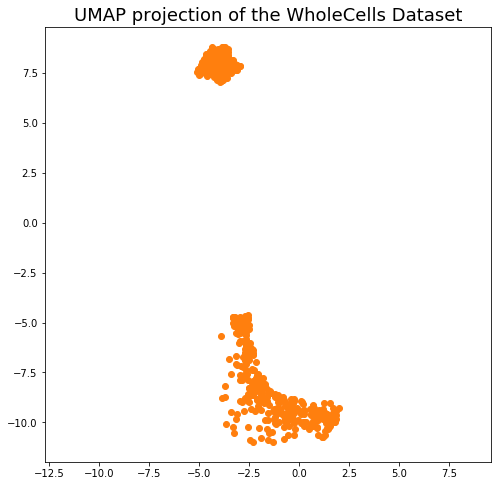

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


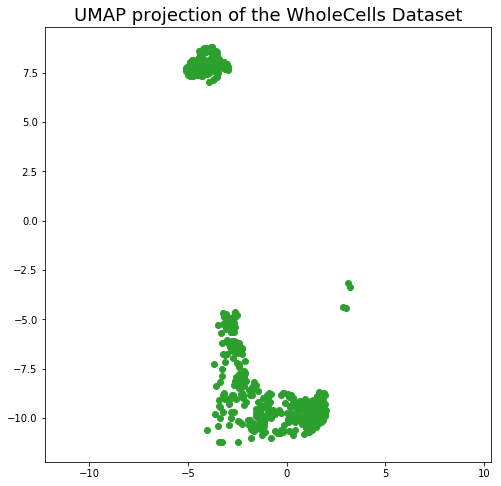

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


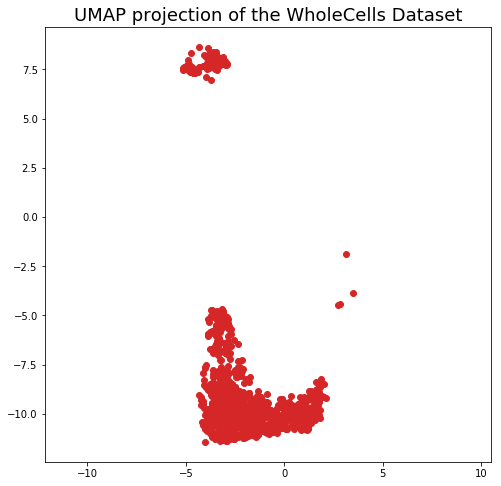

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


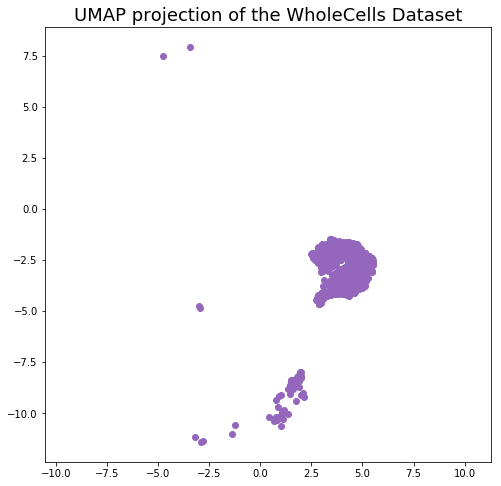

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


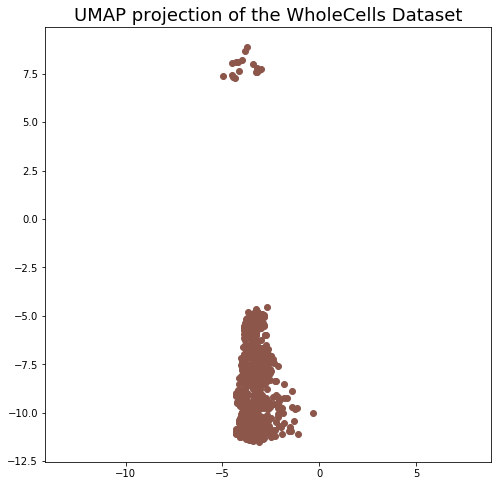

In [29]:
plt.figure(figsize = (8,8))
plt.scatter(embedding[ps_index, 0], embedding[ps_index, 1], c=sns.color_palette()[1] , label  = "ps")
plt.scatter(embedding[np_index, 0], embedding[np_index, 1], c=sns.color_palette()[2] , label  = "np")
plt.scatter(embedding[hf_index, 0], embedding[hf_index, 1], c=sns.color_palette()[3] , label  = "hf")
plt.scatter(embedding[sg_index, 0], embedding[sg_index, 1], c=sns.color_palette()[4] , label  = "4sg")
plt.scatter(embedding[sfg_index, 0], embedding[sfg_index, 1], c=sns.color_palette()[5] , label  = "4sfg")
plt.legend()
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.savefig("umap.png")
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[ps_index, 0], embedding[ps_index, 1], c=sns.color_palette()[1] , label  = "ps")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[np_index, 0], embedding[np_index, 1], c=sns.color_palette()[2] , label  = "np")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[hf_index, 0], embedding[hf_index, 1], c=sns.color_palette()[3] , label  = "hf")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[sg_index, 0], embedding[sg_index, 1], c=sns.color_palette()[4] , label  = "4sg")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[sfg_index, 0], embedding[sfg_index, 1], c=sns.color_palette()[5] , label  = "4sfg")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()